In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook 

In [2]:
data=pd.read_csv('C:\\Users\\Shubh\\Desktop\\nlp\\mobile_cleaned.csv')#C:\Users\Shubh\Desktop\nlp

In [3]:
data.head(5)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [4]:
data.shape

(341, 88)

In [5]:
X = data.drop(["Rating",'PhoneId'],axis=1)
Y=data["Rating"].values   #####real world data

In [6]:
X.shape

(341, 86)

In [7]:
threshold=4.2
data['Class']=(data["Rating"]>=threshold).astype(np.int)

In [8]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [9]:
Y_binarised=data["Class"].values#############binarised data

In [10]:
type(Y_binarised)

numpy.ndarray

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
scaler=StandardScaler()

In [13]:
R=np.random.random([100,1])

In [14]:
R.shape

(100, 1)

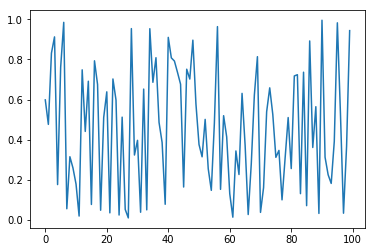

In [15]:
plt.plot(R)

In [16]:
np.mean(R)

0.4550155831138806

In [17]:
np.std(R)

0.2974571664600563

In [18]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaler.mean_   ### underscore

array([0.45501558])

In [20]:
RT=scaler.transform(R)

In [21]:
np.mean(RT)

4.085620730620576e-16

In [22]:
np.std(RT)

0.9999999999999999

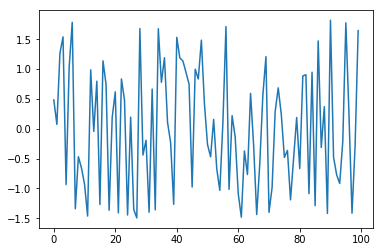

In [23]:
plt.plot(RT)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, random_state=0,stratify=Y_binarised)

In [26]:
scaler=StandardScaler()

In [27]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [28]:
minmax_scaler=MinMaxScaler()

In [29]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1)) ####reshape
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [30]:
scaled_threshold=list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]###important

In [31]:
scaled_threshold

0.6800000000000002

In [32]:
Y_binarised_train=(Y_scaled_train > scaled_threshold).astype('int').ravel()

In [33]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [34]:
Y_binarised_test=(Y_scaled_test > scaled_threshold).astype('int').ravel()

In [179]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return (np.dot(x,self.w.T)+self.b)
    
    def sigmoid(self,x):
        return 1.0/(1+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    
    def fit(self,X,Y,epochs=1,lr=1,initialise=True,display_loss=False):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        if display_loss:
            loss={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw,db=0,0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)

            self.w-=lr*dw
            self.b-=lr*db
        
            if display_loss:
                Y_pred=self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(Y_pred,Y)     ###dictionary
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('meanSQredEror')
            
            
        
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [180]:
sn=SigmoidNeuron()

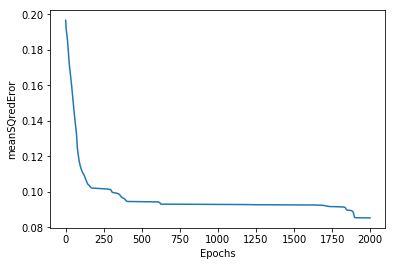

In [181]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=2000,lr=0.015,display_loss=True)

In [182]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [183]:
Y_pred_binarised_train=(Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test=(Y_pred_test > scaled_threshold).astype('int').ravel()

In [184]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [185]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [186]:
print(accuracy_train,accuracy_test)

0.7450980392156863 0.7558139534883721
